In [1]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Импортируем CSV в датафрейм

In [2]:
data = pd.read_csv('/stock/GZPFY Key Ratios.csv', skiprows=2, index_col='Unnamed: 0')

In [3]:
data.head()

,2010-12,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,TTM
Revenue RUB Mil,"1,002,509","1,413,007","1,230,266","1,267,603","1,408,238","1,467,943","1,545,608","1,857,931","2,489,292","2,485,308","2,413,517"
Gross Margin %,75.9,74.2,50.0,57.1,54.5,55.1,55.7,56.2,58.9,55.5,53.5
Operating Income RUB Mil,"142,490","223,249","203,238","226,756","219,656","222,744","238,316","302,523","456,742","446,568","345,993"
Operating Margin %,14.2,15.8,16.5,17.9,15.6,15.2,15.4,16.3,18.3,18.0,14.3
Net Income RUB Mil,"96,299","171,204","176,296","177,917","122,093","109,661","200,179","253,274","376,667","400,201","278,501"


In [4]:
data = data.apply(lambda x: x.str.replace(',', '')) #Удаляем запятые

Определяем функции поиска данных

In [5]:
def search_value(index_name, date):
    '''This function return a specific stock metric of at a specific date
    from dataframe
    '''
    return float(data.loc[index_name, date])

In [6]:
def historical_value(index_name):
    '''This function return a specific stock line metric from dataframe
    '''
    return data.loc[index_name, ].astype(float)

### Получаем основые финансовые метрики

(1)Получаем количество акций Shares Outstanding

In [7]:
historical_value('Shares Mil')

2010-12    944.0
2011-12    944.0
2012-12    944.0
2013-12    944.0
2014-12    944.0
2015-12    944.0
2016-12    944.0
2017-12    944.0
2018-12    944.0
2019-12    944.0
TTM        944.0
Name: Shares Mil, dtype: float64

(2) EPS

In [8]:
historical_value('Earnings Per Share RUB')

2010-12    102.48
2011-12    169.95
2012-12    186.85
2013-12    188.55
2014-12    129.40
2015-12    116.20
2016-12    212.15
2017-12    268.40
2018-12    399.20
2019-12    424.10
TTM        295.10
Name: Earnings Per Share RUB, dtype: float64

(3)Dividend Rate

In [9]:
historical_value('Dividends RUB')

2010-12     14.93
2011-12     21.91
2012-12     30.69
2013-12     21.24
2014-12     43.31
2015-12     74.27
2016-12      2.78
2017-12    106.83
2018-12    140.96
2019-12    130.30
TTM        130.30
Name: Dividends RUB, dtype: float64

(4)Dividend Yield

In [10]:
historical_value('Payout Ratio % *')

2010-12    14.6
2011-12    13.9
2012-12    16.4
2013-12    11.3
2014-12    11.7
2015-12    53.8
2016-12    24.6
2017-12    21.7
2018-12    19.8
2019-12    36.9
TTM        44.1
Name: Payout Ratio % *, dtype: float64

(5)Debt/Equity Ratio

In [11]:
historical_value('Debt/Equity')

2010-12    0.26
2011-12    0.23
2012-12    0.20
2013-12    0.27
2014-12    0.47
2015-12    0.58
2016-12    0.44
2017-12    0.37
2018-12    0.38
2019-12    0.37
TTM        0.41
Name: Debt/Equity, dtype: float64

(6)Book Value Per Share

In [12]:
historical_value('Book Value Per Share * RUB')

2010-12    19.71
2011-12    22.52
2012-12    29.13
2013-12    29.25
2014-12    19.88
2015-12    16.80
2016-12    22.97
2017-12    27.87
2018-12    28.34
2019-12    35.42
TTM        31.06
Name: Book Value Per Share * RUB, dtype: float64

(7)ROE (Return on Equity)

In [13]:
historical_value('Return on Equity %')

2010-12    18.20
2011-12    25.87
2012-12    22.22
2013-12    19.91
2014-12    12.10
2015-12     9.87
2016-12    15.90
2017-12    17.39
2018-12    22.20
2019-12    20.54
TTM        14.01
Name: Return on Equity %, dtype: float64

(8)Current Ratio

In [14]:
historical_value('Current Ratio')

2010-12    1.46
2011-12    2.05
2012-12    1.87
2013-12    2.08
2014-12    1.88
2015-12    1.46
2016-12    1.37
2017-12    0.88
2018-12    1.18
2019-12    1.50
TTM        1.48
Name: Current Ratio, dtype: float64

## Get Stock Price

In [15]:
price = wb.DataReader('SIBN.ME', data_source='yahoo', start='2010-1-1') # Получаем данные с yahoo finance для одного тикера

Latest P/E

In [16]:
latest_price = price.loc['2020-07-14','Close']
latest_eps = search_value('Earnings Per Share RUB', '2019-12')
latest_PtoE = latest_price/latest_eps
print(latest_PtoE)

0.7577222497135477


Latest P/BV

In [17]:
latest_price = price.loc['2020-07-15','Close']
latest_eps = search_value('Book Value Per Share * RUB', '2019-12')
latest_PtoBV = latest_price/latest_eps
print(latest_PtoBV)

8.952569342278814


Traspose Dataframe

In [18]:
data = data.T

In [19]:
col_names = ['Shares Mil','Earnings Per Share RUB','Dividends RUB',
            'Payout Ratio % *', 'Debt/Equity', 'Book Value Per Share * RUB',
            'Return on Equity %', 'Current Ratio']
data = data[col_names]
data.head()

,Shares Mil,Earnings Per Share RUB,Dividends RUB,Payout Ratio % *,Debt/Equity,Book Value Per Share * RUB,Return on Equity %,Current Ratio
2010-12,944,102.48,14.93,14.6,0.26,19.71,18.20,1.46
2011-12,944,169.95,21.91,13.9,0.23,22.52,25.87,2.05
2012-12,944,186.85,30.69,16.4,0.20,29.13,22.22,1.87
2013-12,944,188.55,21.24,11.3,0.27,29.25,19.91,2.08
2014-12,944,129.40,43.31,11.7,0.47,19.88,12.10,1.88


In [20]:
new_col = ['shares_outstanding', 'earning_per_share', 'dividend_rate', 
           'dividend_yield', 'debt_to_equity', 'book_value_per_share',
          'return_on_equity', 'current_ratio']
data.columns = new_col
data.head()

,shares_outstanding,earning_per_share,dividend_rate,dividend_yield,debt_to_equity,book_value_per_share,return_on_equity,current_ratio
2010-12,944,102.48,14.93,14.6,0.26,19.71,18.20,1.46
2011-12,944,169.95,21.91,13.9,0.23,22.52,25.87,2.05
2012-12,944,186.85,30.69,16.4,0.20,29.13,22.22,1.87
2013-12,944,188.55,21.24,11.3,0.27,29.25,19.91,2.08
2014-12,944,129.40,43.31,11.7,0.47,19.88,12.10,1.88


In [21]:
data = data.apply(pd.to_numeric)

## Calculating intrinsic value

Расчет методом дивидендов и балансовой стоимости

In [22]:
dvd_avg = data['dividend_rate'].mean() # Определим средний дивиденд
print(dvd_avg)

65.22909090909091


In [41]:
risk_free_rate = 0.18
# The discounted capital for the dividend of 3-year later
dvd_avg/(1+risk_free_rate)**3
# The discounted capital for the dividend of 10-year later
#dvd_avg/(1+risk_free_rate)**10

39.70043852407678

In [42]:
dvd_total = 0
for i in range(1,11):
    dvd_total = dvd_total + dvd_avg/(1+risk_free_rate)**i
print(dvd_total)

293.1451634849241


Estimate future book value

In [43]:
book_value = data['book_value_per_share']
growth_rate_of_9y= book_value['2019-12']/book_value['2010-12']
avg_growth_rate = growth_rate_of_9y**(1/9)
print(avg_growth_rate)

1.0672954529262744


In [44]:
bvps_pred = book_value['2019-12']*(avg_growth_rate**10)
print(bvps_pred)

67.93524541190331


## Стоимость акции по дивам и балансовой стоимости (наивный метод)

In [45]:
data_intrinsic = bvps_pred + dvd_total
print(data_intrinsic)

361.0804088968274


In [46]:
data_intrinsic - latest_price #Маржа безопасности

43.98040279331178

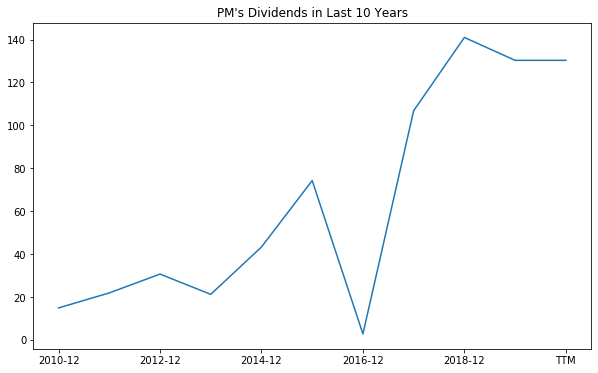

In [47]:
data['dividend_rate'].plot(figsize=(10,6), title="PM's Dividends in Last 10 Years")

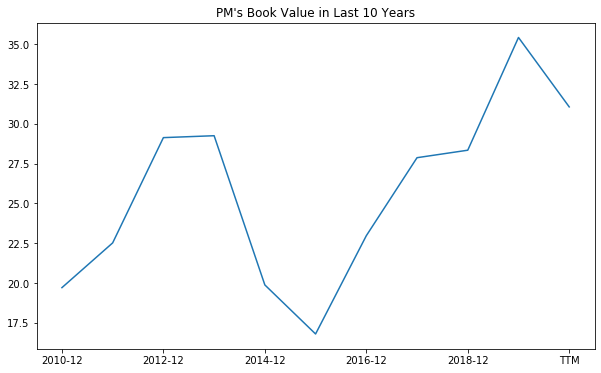

In [48]:
data['book_value_per_share'].plot(figsize=(10,6), title="PM's Book Value in Last 10 Years")

### Расчет стоимости по дивам и балансовой стоимости с помощью линейной регрессии

In [49]:
# 'year_index' as the order of the year
data['year_index'] = range(1, len(data) + 1)
# add intercept
data['intercept'] = 1

In [50]:
data.head()

,shares_outstanding,earning_per_share,dividend_rate,dividend_yield,debt_to_equity,book_value_per_share,return_on_equity,current_ratio,year_index,intercept
2010-12,944,102.48,14.93,14.6,0.26,19.71,18.20,1.46,1,1
2011-12,944,169.95,21.91,13.9,0.23,22.52,25.87,2.05,2,1
2012-12,944,186.85,30.69,16.4,0.20,29.13,22.22,1.87,3,1
2013-12,944,188.55,21.24,11.3,0.27,29.25,19.91,2.08,4,1
2014-12,944,129.40,43.31,11.7,0.47,19.88,12.10,1.88,5,1


In [51]:
# modeling
bvps_model = sm.OLS(data['book_value_per_share'], data[['year_index','intercept']]).fit()

In [52]:
bvps_pred_lr = bvps_model.predict([19,1])[0] #Прогнозируем балансовую стоимость через 10 лет
print(bvps_pred_lr)

38.28663636363636


In [53]:
data_new = data.dropna(subset = ['dividend_rate']) #Избавиться от NAN

In [54]:
dvd_model = sm.OLS(data_new['dividend_rate'], data_new[['year_index','intercept']]).fit()

In [55]:
dvd_model.predict([19,1])[0] #Определить дивиденд через 10 лет

239.17736363636368

In [56]:
# Дивиденды за 10 лет
dvd_total_lr = 0
current_year_order = 9
for i in range(1,11):
    dvd_new = dvd_model.predict([current_year_order + i,1])[0]
    dvd_total_lr = dvd_total_lr + dvd_new/(1+risk_free_rate)**i
print(dvd_total_lr)

725.7250623780853


In [57]:
aapl_intrinsic_lr = dvd_total_lr + bvps_pred_lr
print(aapl_intrinsic_lr)

764.0116987417217


In [58]:
aapl_intrinsic_lr - latest_price #Маржа безопасности

446.9116926382061